<a href="https://colab.research.google.com/github/StarlightProg/Currency/blob/master/Week_02/Week_02_Lab_Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 02 Lab: Linear models
This notebook was developed using methodologies suggested by ChatGPT (OpenAI, 2025)

# Intro

In this lab, we will learn how **linear models** work by starting from scratch.

- First, we will use **NumPy** to manually implement gradient descent for **linear regression**.
- Then, we will progressively use **PyTorch** and later **PyTorch Lightning** to make our life easier.
- Finally, we will extend from **linear regression** to **logistic regression** for classification.

---


# Block 1: Gradient descent implemented manually
**Goal:** Fit a line `y = wx + b` to some toy data using gradient descent, without any ML libraries.  
We will:
1. Create toy data `(X, Y)`.
2. Define a prediction function.
3. Define Mean Squared Error (MSE) loss.
4. Compute gradients **manually**.
5. Update parameters step by step.
6. Visualize the results.

This shows how training actually works under the hood.

## Step 1: Generate Date

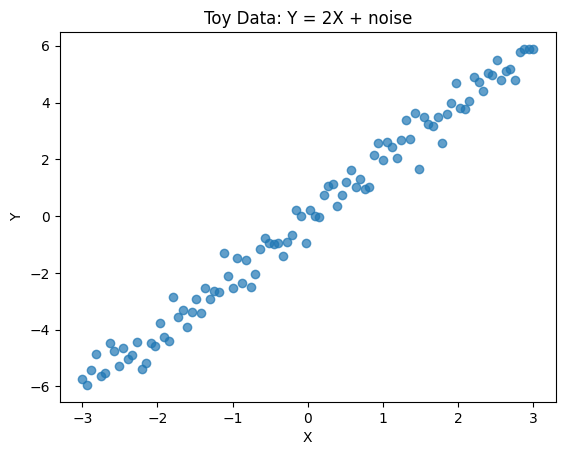

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate toy data: Y = 2*X + noise
X = np.linspace(-3, 3, 100)
noise = np.random.randn(100) * 0.5
Y = 2 * X + noise

# Visualize data
plt.scatter(X, Y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Toy Data: Y = 2X + noise")
plt.show()

## Step 2, 3: Initialize Model Parameters and the model itself

In [2]:
# Initialize parameters randomly
w = np.random.randn()
b = np.random.randn()

print("Initial parameters: w =", w, "b =", b)


Initial parameters: w = -1.4153707420504142 b = -0.42064532276535904


In [3]:
def predict(x, w, b):
    """Linear model prediction: y = wx + b"""
    return w * x + b

# Test prediction
print("Prediction for x=1.0:", predict(1.0, w, b))


Prediction for x=1.0: -1.8360160648157733


## Step 4: Define Objective (MSE)

In [7]:
def mse_loss(y_true, y_pred):
    """Mean Squared Error"""
    # TODO: implement formula: mean((y_true - y_pred)**2)
    loss = ((y_true - y_pred) ** 2).mean()  # add your code here
    return loss

# Test loss function
y_pred_test = predict(X, w, b)
print("Initial loss:", mse_loss(Y, y_pred_test))


Initial loss: 36.281617520023495


## Step 5: Compute Gradient

In [25]:
def compute_gradients(x, y_true, y_pred):
    """Compute gradients of loss wrt w and b"""
    N = len(x)
    error = y_true - y_pred
    # TODO: implement gradients
    dw = (-2/N) * np.dot(x.T, error) # add your code here
    db = (-1/N) * sum(error)  # add your code here
    return dw, db


## Step 6: Training Loop

In [26]:
# Hyperparameters
lr = 0.01   # learning rate
epochs = 50

loss_history = []

for epoch in range(epochs):
    # Forward pass: prediction
    y_pred = predict(X, w, b)

    # Compute loss
    loss = mse_loss(Y, y_pred)
    loss_history.append(loss)

    # Backward pass: gradients
    dw, db = compute_gradients(X, Y, y_pred)

    # Parameter update
    # TODO: update w and b using dw, db and learning rate
    w -= lr*dw  # add your code here
    b -= lr*db  # add your code here

    # Print progress every 10 epochs
    # if (epoch+1) % 10 == 0:
    #     print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, w={w:.2f}, b={b:.2f}")

# Plot loss curve
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.show()


/tmp/ipython-input-2922096913.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return w * x + b
/tmp/ipython-input-4034410343.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  dw = (-2/N) * np.dot(x.T, error) # add your code here


TypeError: unsupported operand type(s) for -=: 'numpy.ndarray' and 'Tensor'

## Step 7: Visualization

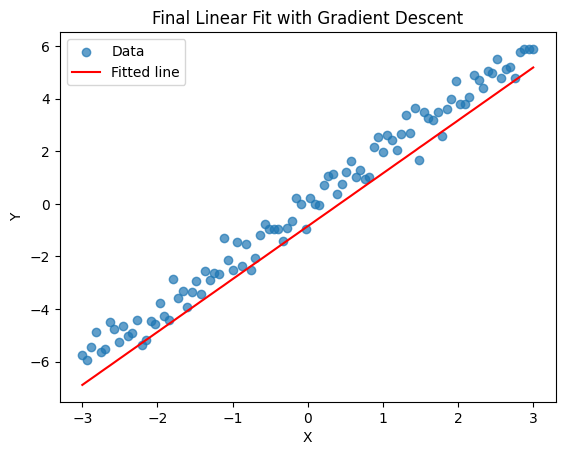

In [18]:
plt.scatter(X, Y, alpha=0.7, label="Data")
plt.plot(X, predict(X, w, b), color="red", label="Fitted line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Final Linear Fit with Gradient Descent")
plt.legend()
plt.show()


# Block 2: Gradient Descent Implemented with Pytorch



## Step 1: Imports and Data

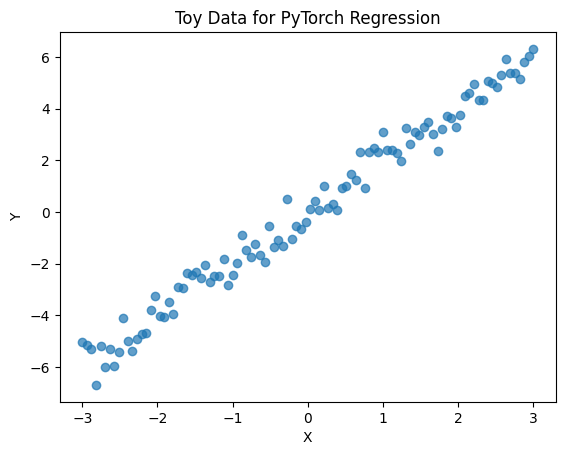

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate toy data again (same as Block 1)
torch.manual_seed(42)
X = torch.linspace(-3, 3, 100).view(-1, 1)   # shape (100,1)
Y = 2 * X + torch.randn(100, 1) * 0.5

# Visualize
plt.scatter(X.numpy(), Y.numpy(), alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Toy Data for PyTorch Regression")
plt.show()


## Step 2: Define Model

In [22]:
# Define a simple linear model: y = wx + b
# TODO: replace with nn.Linear(input dim, output dim)
model = nn.Linear(1,1)  # add your code here

## Step 3: Define Objective and Optimizer

In [29]:
# Define Mean Squared Error loss
# TODO: use nn.MSELoss()
criterion = nn.MSELoss()  # add your code here

# Define optimizer (e.g., SGD)
# TODO: use optim.SGD with model parameters and learning rate
optimizer = optim.SGD(model.parameters(), lr)  # add your code here


## Step 4: Training Loop

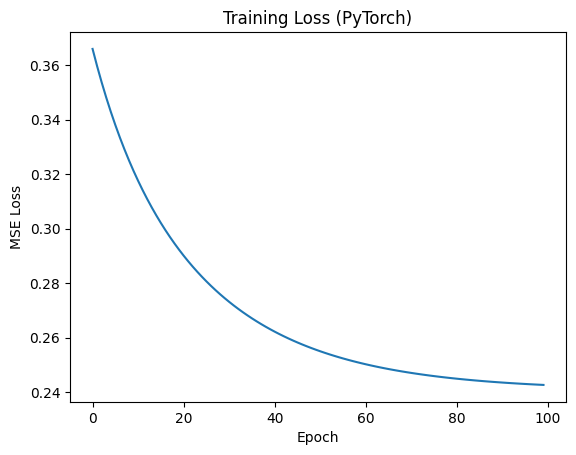

In [32]:
epochs = 100
loss_history = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)

    # Compute loss
    loss = criterion(y_pred, Y)
    loss_history.append(loss.item())

    # Backward pass
    optimizer.zero_grad()   # reset gradients
    loss.backward()         # compute gradients
    optimizer.step()        # update weights

    if (epoch+1) % 10 == 0:
        # TODO: print epoch, loss, and model parameters
        pass  # add your code here

# Plot loss curve
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss (PyTorch)")
plt.show()


## Step 5: Visualize Final Fit

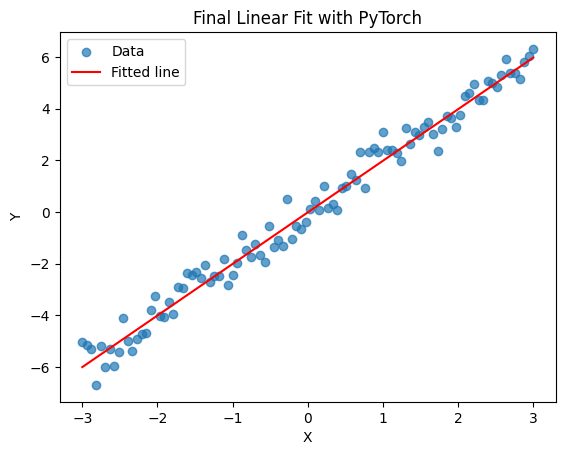

In [33]:
plt.scatter(X.numpy(), Y.numpy(), alpha=0.7, label="Data")
plt.plot(X.numpy(), model(X).detach().numpy(), color="red", label="Fitted line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Final Linear Fit with PyTorch")
plt.legend()
plt.show()

# Block 3: Regression model

## Step 1: Generate Data

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Generate nonlinear data: y = 0.5 * x^2 + noise
torch.manual_seed(42)
X = torch.linspace(-3, 3, 200).view(-1, 1)
Y = 0.5 * (X ** 2) + torch.randn(200, 1) * 0.3

# Visualize
plt.scatter(X.numpy(), Y.numpy(), alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Nonlinear Toy Data for Regression")
plt.show()


## Step 2: Define Dataset and Dataloader

In [ ]:
class ToyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        # TODO: return (X[idx], Y[idx])
        return None  # add your code here

# Create dataset and dataloader
dataset = ToyDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


## Step 3: Define Model, Objective, Optimizer

In [ ]:
# Simple linear model (won’t be perfect on quadratic data)
# TODO: use nn.Linear(1, 1)
model = None  # add your code here

# MSE loss
criterion = nn.MSELoss()

# Optimizer
# TODO: use SGD with lr=0.05
optimizer = None  # add your code here


## Step 4: Training Loop

In [ ]:
epochs = 50
loss_history = []

for epoch in range(epochs):
    for batch_X, batch_Y in dataloader:
        # Forward pass
        y_pred = model(batch_X)

        # Loss
        loss = criterion(y_pred, batch_Y)
        loss_history.append(loss.item())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


## Step 5: Visualization

In [ ]:
# Plot data
plt.scatter(X.numpy(), Y.numpy(), alpha=0.7, label="Data")

# Model predictions
with torch.no_grad():
    Y_pred = model(X)
plt.plot(X.numpy(), Y_pred.numpy(), color="red", label="Fitted Line")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regression with DataLoader (Linear Model)")
plt.legend()
plt.show()


# Block 4: Logistic Regression Model

## Step 1: Install & Imports

In [34]:
!pip install torch torchvision pytorch-lightning -q

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import pytorch_lightning as pl
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 36.1 MB/s eta 0:00:00


## Step 2: Dataset and Dataloader

In [ ]:
class MNIST37(torch.utils.data.Dataset):
    def __init__(self, train=True, transform=None):
        # load MNIST
        self.dataset = datasets.MNIST(root="./data", train=train, download=True)

        # filter only 3 and 7
        mask = (self.dataset.targets == 3) | (self.dataset.targets == 7)
        self.data = self.dataset.data[mask]
        self.targets = self.dataset.targets[mask]

        # convert labels: 3 -> 0, 7 -> 1
        self.targets = (self.targets == 7).long()

        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.targets[idx]

        if self.transform:
            x = self.transform(x)

        return x, y



In [ ]:
transform = transforms.Compose([
    transforms.Lambda(lambda x: x.float() / 255.0),  # scale and cast
    transforms.Lambda(lambda x: x.view(-1))          # flatten
])

train_dataset = MNIST37(train=True, transform=transform)
test_dataset = MNIST37(train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

## Step 3: Set Training with Lightning

In [ ]:
class LogisticRegressionModel(pl.LightningModule):
    def __init__(self, input_dim=784):
        super().__init__()
        # TODO: create linear layer (input_dim -> 1)
        self.linear = nn.Linear(input_dim, 1)  # add your code here
        self.criterion = nn.BCEWithLogitsLoss()

    def forward(self, x):
        # TODO: return raw logits (do not apply sigmoid here)
        return None  # add your code here

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x).squeeze(1)
        loss = self.criterion(logits, y.float())
        return loss

    def configure_optimizers(self):
        # TODO: return SGD optimizer with lr=0.1
        return optim.SGD(self.parameters(), lr=0.1)  # add your code here


## Step 4: Define and Trein the Model

In [ ]:
model = LogisticRegressionModel()

trainer = pl.Trainer(max_epochs=5, accelerator="cpu", log_every_n_steps=10)
trainer = pl.Trainer(
    max_epochs=5,
    accelerator="auto",   # auto-detects CPU/GPU
    devices=1,            # use 1 GPU if present
)

trainer.fit(model, train_loader)

Step 5: Visualize Predictions

In [ ]:
# Show some predictions
examples = next(iter(test_loader))
x, y = examples
with torch.no_grad():
    logits = model(x).squeeze(1)
    preds = (torch.sigmoid(logits) > 0.5).long()

plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i].view(28, 28), cmap="gray")
    plt.title(f"Label: {y[i].item()}, Pred: {preds[i].item()}")
    plt.axis("off")
plt.show()

acc = (preds == y).float().mean()
print('accuracy = ', acc)

# Additional Tasks and Assessment

## 🎯 Main Track (B–D)
- Complete **all blocks** (1–4) by filling in the TODOs in the code.
- Ensure your code runs and produces the expected **plots and metrics**:
  - Block 1: Manual gradient descent
  - Block 2: PyTorch gradient descent
  - Block 3: Regression with Dataset/DataLoader
  - Block 4: Logistic regression on MNIST (digits 3 vs 7)
- Visualizations and logging must be present.  
- **B–D** grades are for correctly completing the main track:
  - **B:** All core tasks complete and correct.
  - **C:** Most core tasks complete, minor errors.
  - **D:** Some core tasks complete, major errors.

---

## 🌟 Additional Tasks (for grade A)
To earn **grade A**, complete **at least one** of the following additional tasks. You may do more for extra learning.

### **Task 1: Multi-digit Classification**
- Extend MNIST37 dataset to another pair of digits (e.g., 0 vs 1).  
- Train a logistic regression model using Lightning.  
- Log training/validation loss and accuracy.  
- Optional: Visualize a **confusion matrix** of predictions.

### **Task 2: Mini-batch Gradient Descent (Manual)**
- Implement **mini-batch gradient descent** on the toy dataset from Block 1.  
- Compare your loss curve with PyTorch training (Block 2).  
- ✅ Goal: Connect **manual GD and library-powered training**.

### **Task 3: Data Noise Exploration**
- In Block 1 or 3, increase the noise in the target variable `Y`.  
- Observe how gradient descent behaves on noisy data.   

### **Task 4: Visualization Enhancements**
- Add validation step into LogisticRegressionModel()
- Add plots showing **loss vs epochs** for both training and validation (if applicable).  
- Visualize **decision boundary** of logistic regression (optional for 2D projections).  

---

## 📊 Assessment Criteria

| Grade | Criteria |
|-------|---------|
| **A** | Successfully completes **at least one additional task** **and** main track completed correctly. |
| **B** | Completes all **main track tasks** correctly (Blocks 1–4) and plots/logging present. |
| **C** | Completes most main track tasks with minor errors. |
| **D** | Completes some main track tasks; significant errors or missing code. |

---

### 💡 Notes
- Include **comments in code** explaining what changes you made for each task.  
- For optional tasks, plots or metrics are strongly encouraged to visualize outcomes.  
- Extra effort beyond A is encouraged, but only one additional task is needed for grade A.

